# Análises do jogo Termo

Algumas análises das palavras utilizadas no jogo [Termo](https://term.ooo/).

As listas de palavras nos arquivos `./words.json` e `./words-all.json` foram encontradas no código-fonte da página do jogo.

O código-fonte do jogo não foi lido, mas com uma análise rápida foi identificado que há duas lista de palavras: 1) lista de palavras válidas que serão sorteadas todos os dias (arquivo `./words.json`). 2) lista de todas as palavras válidas com 5 letras (arquivo `./words-all.json`). Desse modo, somente a lista 1 será considerada para essa análise.

## NOTAS

**Nota 1:** As listas foram extraídas em: 5 de março de 2022.

**Nota 2:** Feito apenas por diversão. Eu não sou especialista de análise de dados.


## INICIALIZAÇÃO

Carregar JSON com a lista de palavras.

In [107]:
import json
import unicodedata

# Remover os acentos/diacríticos na palavra
def remove_accents(word):
    return unicodedata.normalize('NFKD', word).encode('ASCII', 'ignore').decode('utf-8')

file = open("./words.json", "r")
words = json.loads(file.read())
for index in range(len(words)):
    words[index] = remove_accents(words[index])

file_all = open("./words-all.json", "r")
words_all = json.loads(file_all.read())
for index in range(len(words_all)):
    words_all[index] = remove_accents(words_all[index])

### FREQUÊNCIA DE LETRAS

Criar dicionário base para as frequências. Relação de letras (A-Z) e posições (1-5).

In [78]:
import string
frequency = {}
for position in range(1, 6):
    frequency[position] = {}
    for letter in string.ascii_lowercase:
        frequency[position][letter] = 0

Calcular a frequência.

In [79]:
for word in words:
    for position in range(1, 6):
        letter = word[position - 1]
        frequency[position][letter] += 1

Configurar *DataFrame* com a frequência calculada.

In [80]:
import pandas as pd
df = pd.DataFrame(frequency, index=[*string.ascii_lowercase], columns=[*range(1,6)])
# Obter o total da soma das posições em cada letra
total = df.sum(axis=1)
total_df = pd.DataFrame(total, columns=['total'])
# Adicionar o total
df = pd.concat([df, total_df], axis=1)
# Ordenar baseado no total
df = df.sort_values('total', ascending=False)

#### MAPA DE CALOR

<AxesSubplot:>

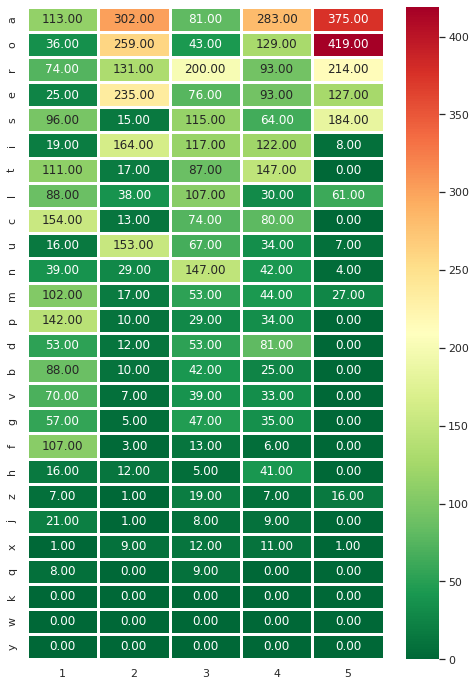

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8, 12)})
color_pallete = sns.color_palette("RdYlGn_r", as_cmap=True)
# Obter DataFrame sem o total
pos_df = df[[*range(1, 6)]]
sns.heatmap(pos_df, annot=True, fmt=".2f", linewidths=3, cmap=color_pallete)

#### LETRAS MAIS FREQUENTES

<AxesSubplot:>

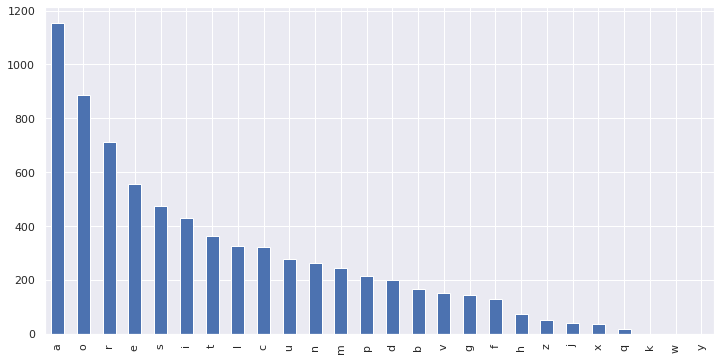

In [23]:
df['total'].plot.bar(figsize=(12, 6))

#### MELHORES PALAVRAS

In [108]:
pos = pos_df.index
for word in words_all:
    if pos[0] in word and pos[1] in word and pos[2] in word and pos[3] in word and pos[4] in word:
        print(word)

rosea
saroe
serao


#### LETRAS MAIS FREQUENTES POR POSIÇÃO

In [81]:
freq = {}
for pos in range(1, 6):
    letters = list(df.sort_values(pos, ascending=False)[:10].index)
    freq[pos] = letters
freq_df = pd.DataFrame(freq, index=[*range(1, 11)])
freq_df

,1,2,3,4,5
1,c,a,r,a,o
2,p,o,n,t,a
3,a,e,i,o,r
4,t,i,s,i,s
5,f,u,l,r,e
6,m,r,t,e,l
7,s,l,a,d,m
8,l,n,e,c,z
9,b,t,c,s,i
10,r,m,u,m,u


### FREQUÊNCIA DE SUFIXOS

Sufixo = 2 últimas letras.

<AxesSubplot:>

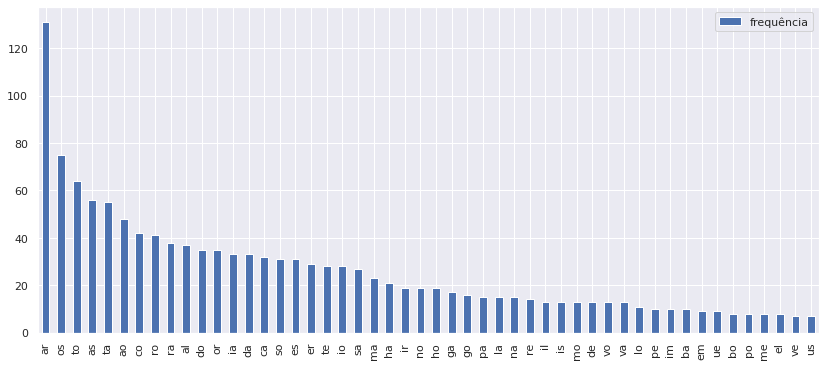

In [86]:
suffixes = {}
for word in words:
    suffix = word[3:]
    if suffix not in suffixes:
        suffixes[suffix] = 0
    suffixes[suffix] += 1
df = pd.DataFrame(suffixes.values(), index=suffixes.keys(), columns=['frequência'])
df = df.sort_values('frequência', ascending=False)
df[:50].plot.bar(figsize=(14, 6))